In [2]:
import pandas as pd

# Load the first CSV file
external_factors_df = pd.read_csv('final_stock_value_with_external_factors.csv')

# Load the second CSV file
internal_factors_df = pd.read_csv('final_stock_value_with_internal_factors.csv')


# Perform a left merge on a common key column, e.g., 'key_column'
final_all_df = pd.merge(external_factors_df, internal_factors_df, on=['Label', 'Year', 'Month'], how='left')

# Rearrange the order of columns
desired_columns = [
    'Label', 'Year', 'Month', 'Close (Rs.)', 'TradeVolume', 'ShareVolume', 'Turnover (Rs.)','Loan Rate', 'Inflation', 'Buy Rate',
      'Election'
]

final_all_df = final_all_df[desired_columns]

# Save the merged DataFrame to a new CSV file
final_all_df.to_csv('all_data.csv', index=False)
final_all_df

,Label,Year,Month,Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Loan Rate,Inflation,Buy Rate,Election


In [42]:
label_to_plot = 'ACL.N0000'
label_df = final_all_df[final_all_df['Label'] == label_to_plot]
label_df

,Label,Year,Month,Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Loan Rate,Inflation,Buy Rate,Election
0,ACL.N0000,1995,1,190.000000,1.5,750.0,145950.00,20.7,2.4,49.96000,0
45,ACL.N0000,1995,2,159.321429,2.0,600.0,105500.00,20.7,1.0,49.88000,0
90,ACL.N0000,1995,3,171.225000,2.0,1350.0,231900.00,20.7,-0.9,49.45000,0
136,ACL.N0000,1995,4,157.555556,2.0,5000.0,800000.00,20.7,0.7,49.36000,0
179,ACL.N0000,1995,5,143.791667,1.5,1150.0,166000.00,20.7,8.1,49.60500,0
...,...,...,...,...,...,...,...,...,...,...,...
15411,ACL.N0000,2023,5,71.380952,167.0,107009.0,7680498.50,16.5,25.2,302.42570,0
15456,ACL.N0000,2023,6,74.445000,168.5,160948.5,11259852.75,14.0,12.0,297.41325,0
15500,ACL.N0000,2023,7,84.890000,286.0,289041.0,24528303.25,12.0,6.3,314.12565,0
15544,ACL.N0000,2023,8,76.138095,189.0,234159.0,16883405.20,12.0,4.0,315.05740,0


In [43]:
label_to_plot = 'ACL.N0000'
label_df = final_all_df[final_all_df['Label'] == label_to_plot]
# Define the columns for which you want to calculate the percentage change
columns_to_calculate_percentage = ['Close (Rs.)', 'TradeVolume', 'ShareVolume', 'Turnover (Rs.)', 'Loan Rate', 'Inflation', 'Buy Rate', 'Election']

# Group the data by 'Label' and calculate the percentage change relative to the first row in each group
# Calculate the percentage change for each cell in the specified columns relative to the sum of all the columns in the same row
# Calculate the percentage change for each cell in the specified columns relative to the sum of all the columns in the same row
for column in columns_to_calculate_percentage:
    label_df[column] = (label_df[column] / label_df[columns_to_calculate_percentage].sum(axis=1)) * 100
# Replace NaN values in the 'Election' column with 0
label_df['Election'].fillna(0, inplace=True)
# Create a new DataFrame with the percentage change values
new_df = label_df[['Label', 'Year', 'Month'] + columns_to_calculate_percentage]
new_df

/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_7269/3867563195.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df[column] = (label_df[column] / label_df[columns_to_calculate_percentage].sum(axis=1)) * 100
/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_7269/3867563195.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df[column] = (label_df[column] / label_df[columns_to_calculate_percentage].sum(axis=1)) * 100
/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykern

,Label,Year,Month,Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Loan Rate,Inflation,Buy Rate,Election
0,ACL.N0000,1995,1,0.129283,0.001022,0.510993,99.949528,11.920473,1.455681,30.476984,0.0
45,ACL.N0000,1995,2,0.149833,0.001884,0.565122,99.931519,12.018927,0.611444,30.571457,0.0
90,ACL.N0000,1995,3,0.073332,0.000857,0.578606,99.969866,12.185598,-0.557765,30.581230,0.0
136,ACL.N0000,1995,4,0.019567,0.000248,0.621063,99.991076,12.077580,0.430056,30.375461,0.0
179,ACL.N0000,1995,5,0.085911,0.000897,0.687682,99.952324,11.555736,4.765055,29.765511,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15411,ACL.N0000,2023,5,0.000917,0.002144,1.374050,99.995502,3.703718,5.823869,73.168824,0.0
15456,ACL.N0000,2023,6,0.000652,0.001475,1.409218,99.997115,3.295500,2.897730,73.432661,0.0
15500,ACL.N0000,2023,7,0.000342,0.001152,1.164658,99.998640,2.767589,1.484595,74.873357,0.0
15544,ACL.N0000,2023,8,0.000445,0.001104,1.367919,99.998031,2.775048,0.945180,74.987755,0.0


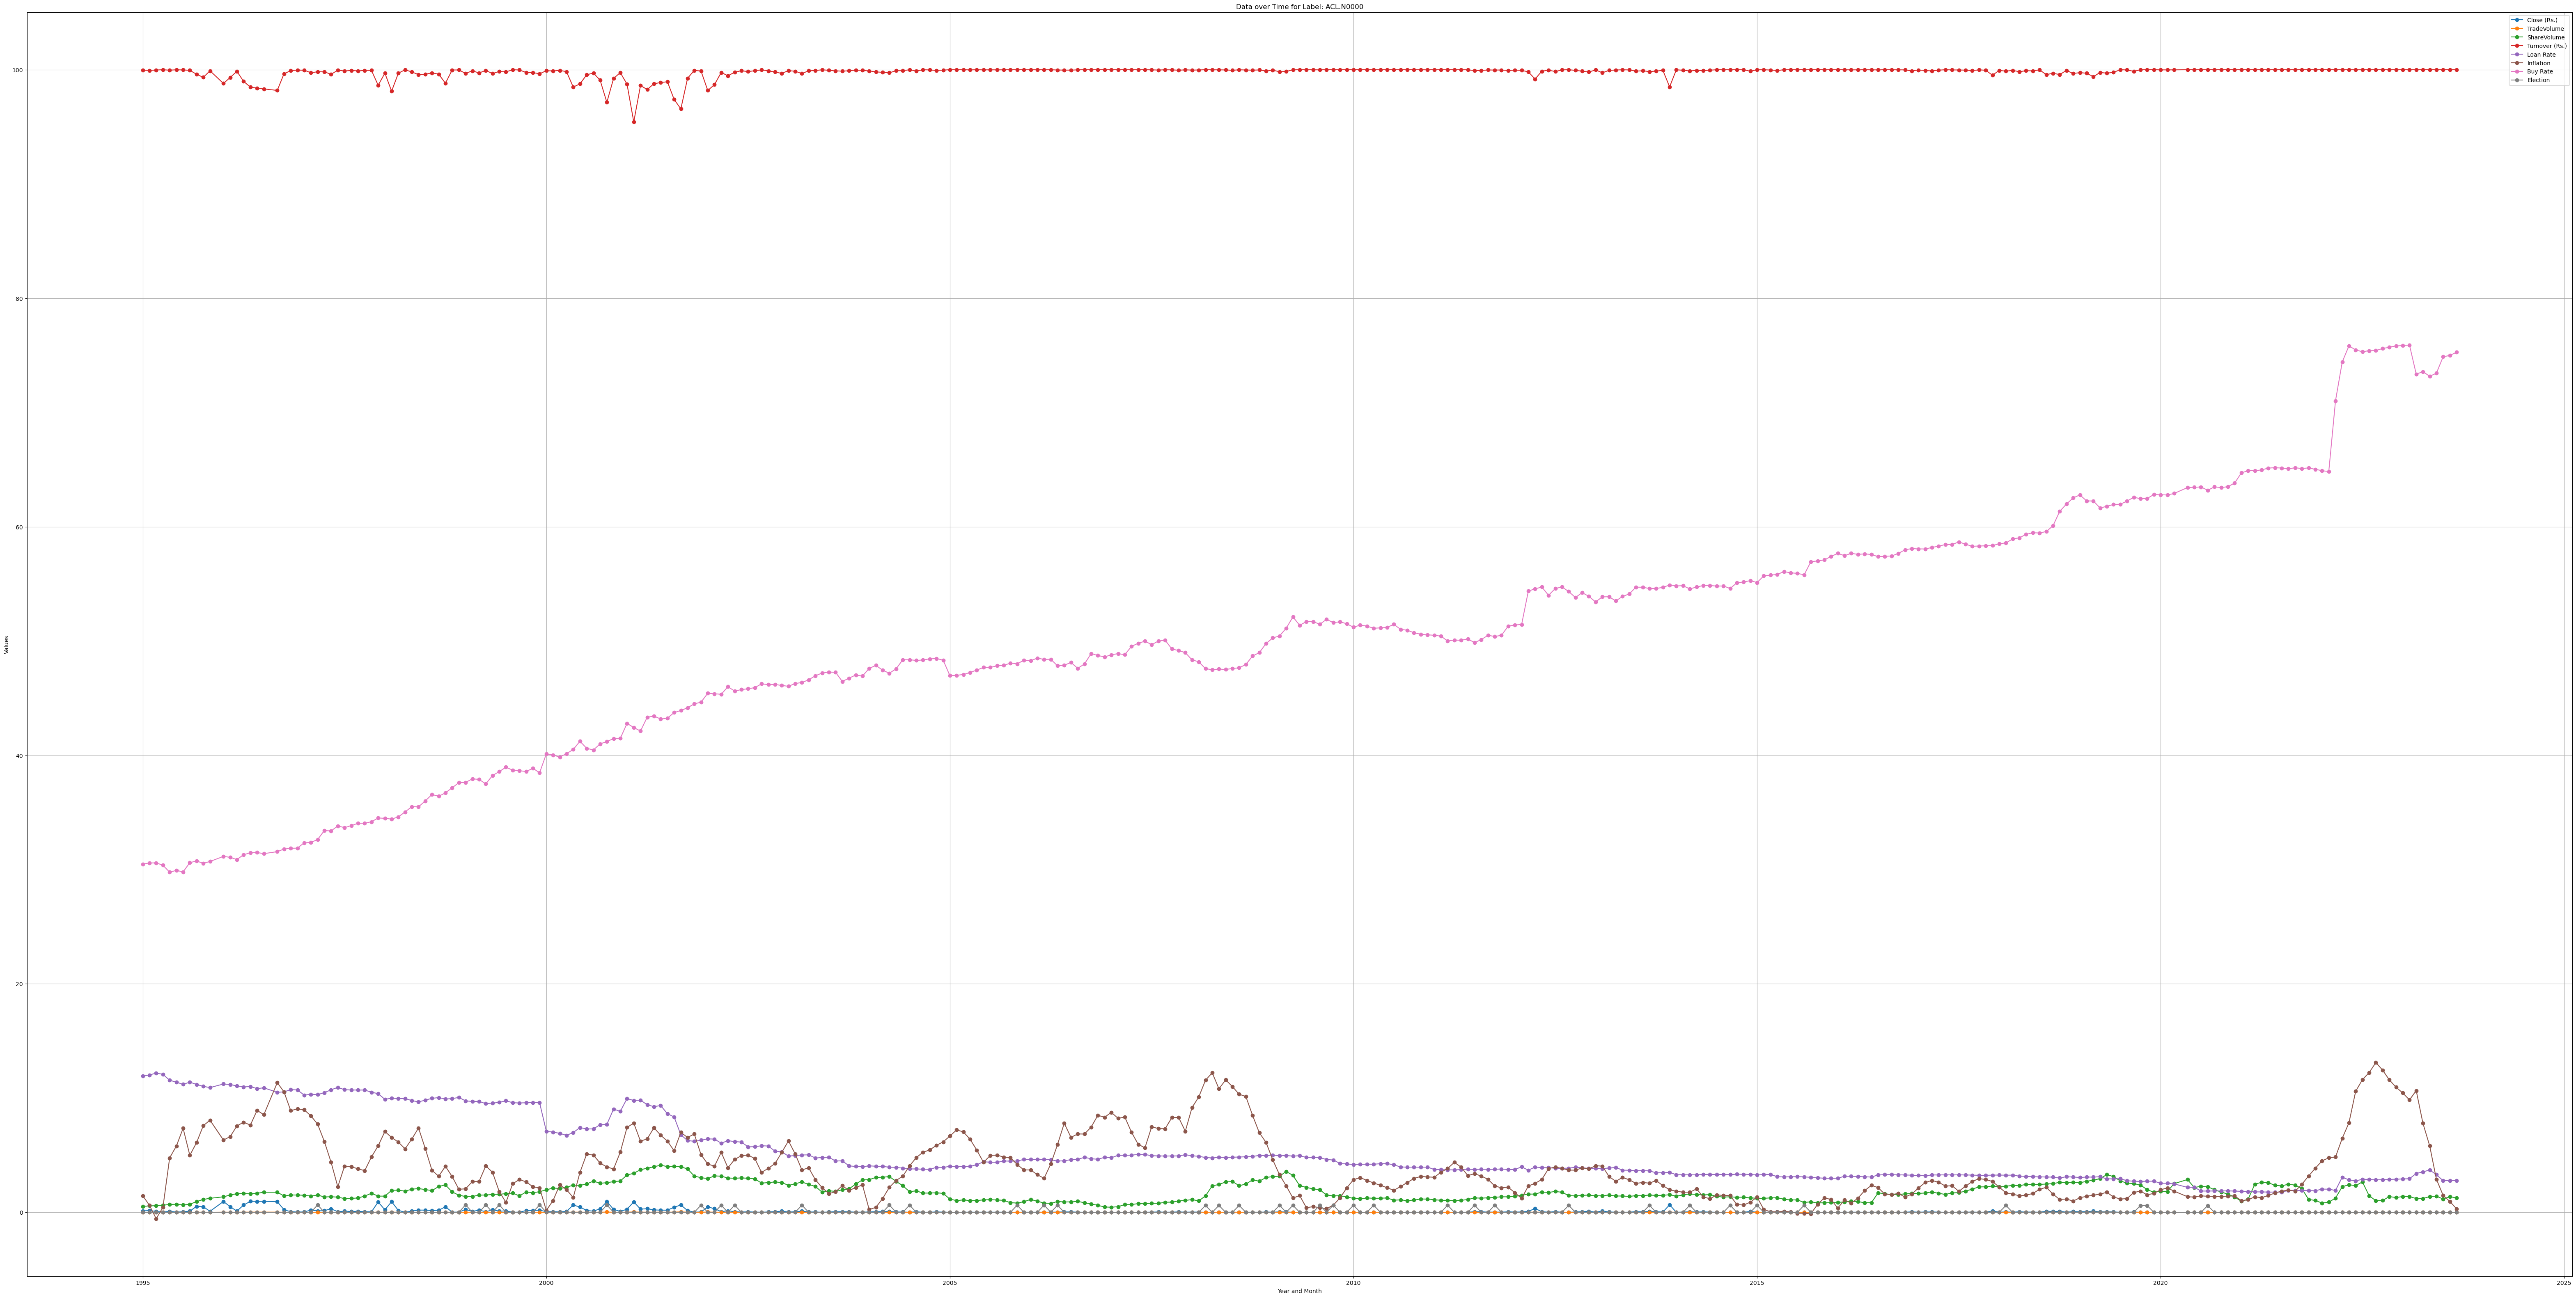

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame
# Replace 'data.csv' with the actual path to your CSV file
final_all_df = pd.read_csv('./all_data.csv')

# Choose the label you want to plot
label_to_plot = 'ACL.N0000'

# Filter the DataFrame for the selected label
label_df = new_df[new_df['Label'] == label_to_plot]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(80, 40))

# Plot the data for 'Close (Rs.)'
ax.plot(label_df['Year'] + (label_df['Month'] - 1) / 12, label_df['Close (Rs.)'], label='Close (Rs.)', marker='o', linestyle='-')
ax.plot(label_df['Year'] + (label_df['Month'] - 1) / 12, label_df['TradeVolume'], label='TradeVolume', marker='o', linestyle='-')
ax.plot(label_df['Year'] + (label_df['Month'] - 1) / 12, label_df['ShareVolume'], label='ShareVolume', marker='o', linestyle='-')
ax.plot(label_df['Year'] + (label_df['Month'] - 1) / 12, label_df['Turnover (Rs.)'], label='Turnover (Rs.)', marker='o', linestyle='-')
ax.plot(label_df['Year'] + (label_df['Month'] - 1) / 12, label_df['Loan Rate'], label='Loan Rate', marker='o', linestyle='-')
ax.plot(label_df['Year'] + (label_df['Month'] - 1) / 12, label_df['Inflation'], label='Inflation', marker='o', linestyle='-')
ax.plot(label_df['Year'] + (label_df['Month'] - 1) / 12, label_df['Buy Rate'], label='Buy Rate', marker='o', linestyle='-')
ax.plot(label_df['Year'] + (label_df['Month'] - 1) / 12, label_df['Election'], label='Election', marker='o', linestyle='-')

# Set x-axis label
ax.set_xlabel('Year and Month')

# Set y-axis label
ax.set_ylabel('Values')

# Add a legend
ax.legend()

# Set the title
plt.title(f'Data over Time for Label: {label_to_plot}')

# Show the grid
ax.grid()

# Display the plot
plt.show()
